Please run on colab only (VS code might give some error sometimes)

Team Members

Hiya Jain            : PES1UG22AM069

Varshini Gopal     :   PES1UG22AM908

Astha Kumari         : PES1UG22AM910

Vanshika Ashok Jadhav : PES1UG22AM911

Datasets used:

1.https://www.kaggle.com/datasets/lava18/google-play-store-apps

2.https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews


# Advanced Data Analytics Project: Causal Discovery in Android App Market

Welcome to this project, where we delve into identifying causal relationships between factors influencing app success in the Google Play Android app market. This notebook is structured to provide a comprehensive analysis using advanced data analytics techniques.

## Objectives
- **Data Exploration**: Understand the dataset and visualize trends.
- **Feature Engineering**: Create meaningful features that capture the essence of the dataset.
- **Predictive Modeling**: Develop machine learning models to predict app success.
- **Causal Analysis**: Use counterfactual analysis to interpret how different factors influence outcomes.



In [ ]:
import pandas as pd

# Load the datasets
reviews_df = pd.read_csv('reviews.csv')
googleplaystore_df = pd.read_csv('googleplaystore.csv')

# Display the first few rows of each dataset to understand their structure
reviews_df.head()
googleplaystore_df.head()

# Data Preprocessing on googleplaystore_df
# Handle missing values
googleplaystore_df.dropna(inplace=True)

# Convert categorical variables to numeric using one-hot encoding
googleplaystore_df = pd.get_dummies(googleplaystore_df, columns=['Category'], drop_first=True)

# Display the dataset after preprocessing
googleplaystore_df.head()


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,False,False,False,False,False,False,False,False,False,False


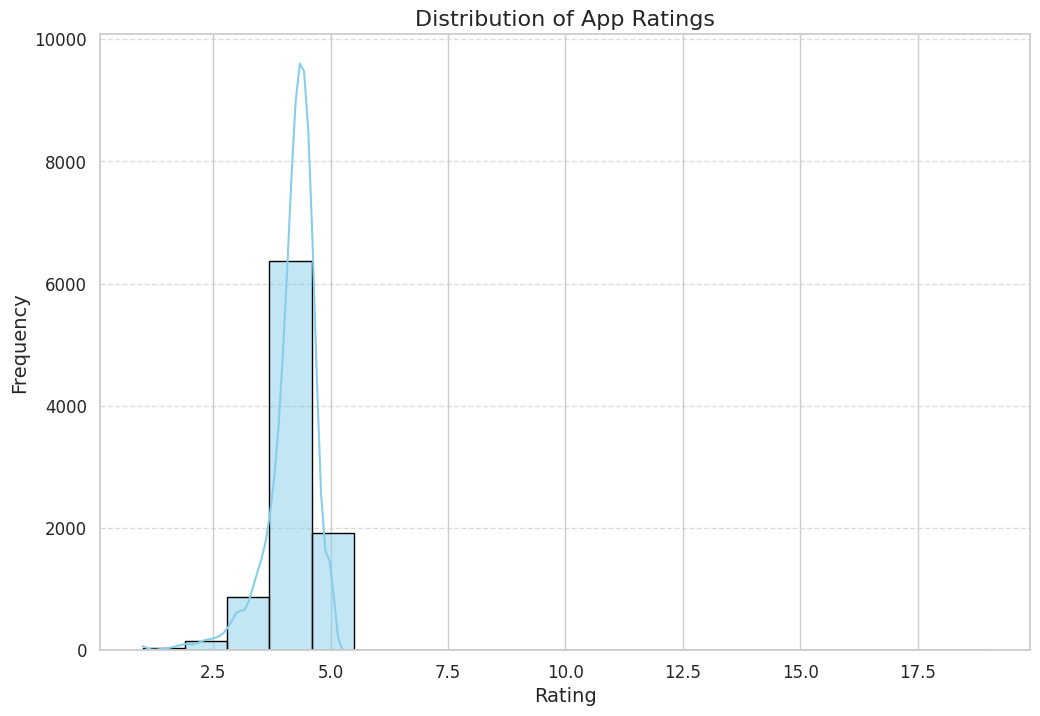

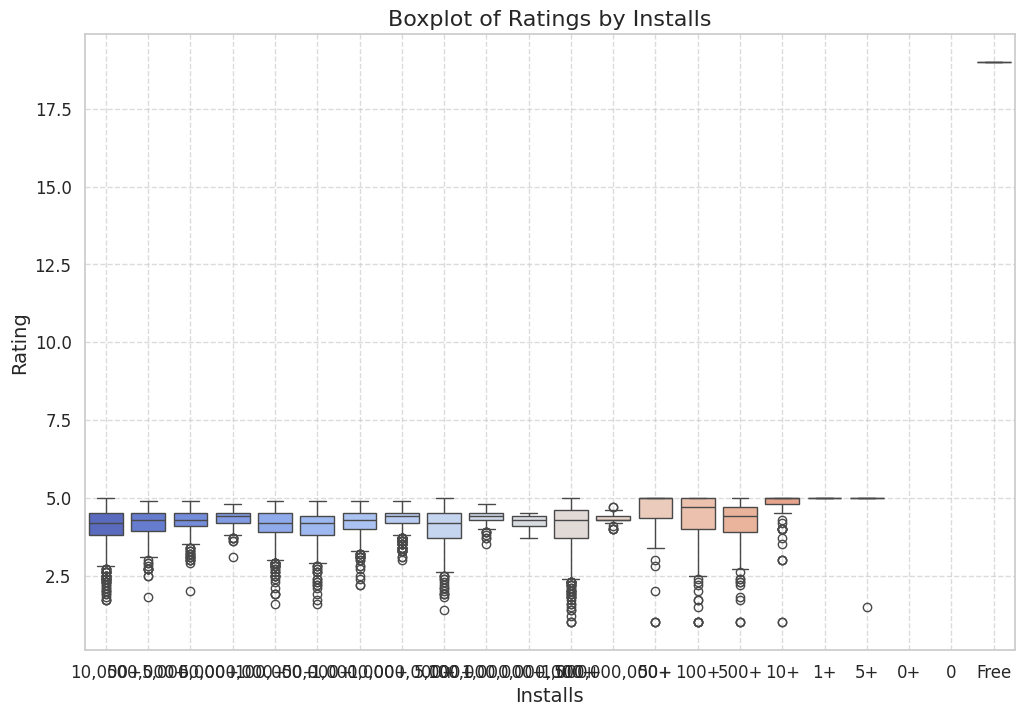

In [ ]:
import pandas as pd


googleplaystore_df = pd.read_csv('/content/googleplaystore.csv')


import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")

# Plot 1: Distribution of App Ratings
plt.figure(figsize=(12, 8))
sns.histplot(googleplaystore_df['Rating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Boxplot of Ratings by Installs
plt.figure(figsize=(12, 8))
sns.boxplot(x='Installs', y='Rating', data=googleplaystore_df, palette="coolwarm", width=0.8)
plt.title('Boxplot of Ratings by Installs', fontsize=16)
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




In [ ]:
!pip install dowhy



## Feature Engineering

Feature engineering is a crucial part of this project. Here, we extract and transform features to improve the performance of predictive models. The focus will be on creating features that have a causal relationship with app success, like ratings, reviews, and category influences.

### Goals:
- Normalize and clean data to handle any outliers or missing values.
- Engineer features that can provide better insights into the underlying patterns.


This Python class performs a comprehensive causal analysis of app store data using advanced techniques from causal inference. It includes methods for data cleaning, creating a causal graph, estimating treatment effects, and conducting intervention analysis to understand the relationships between various app attributes like price, installs, rating, and category. The analysis uses libraries such as networkx, dowhy, and machine learning techniques from scikit-learn to identify causal relationships and estimate the impact of different factors on app performance.

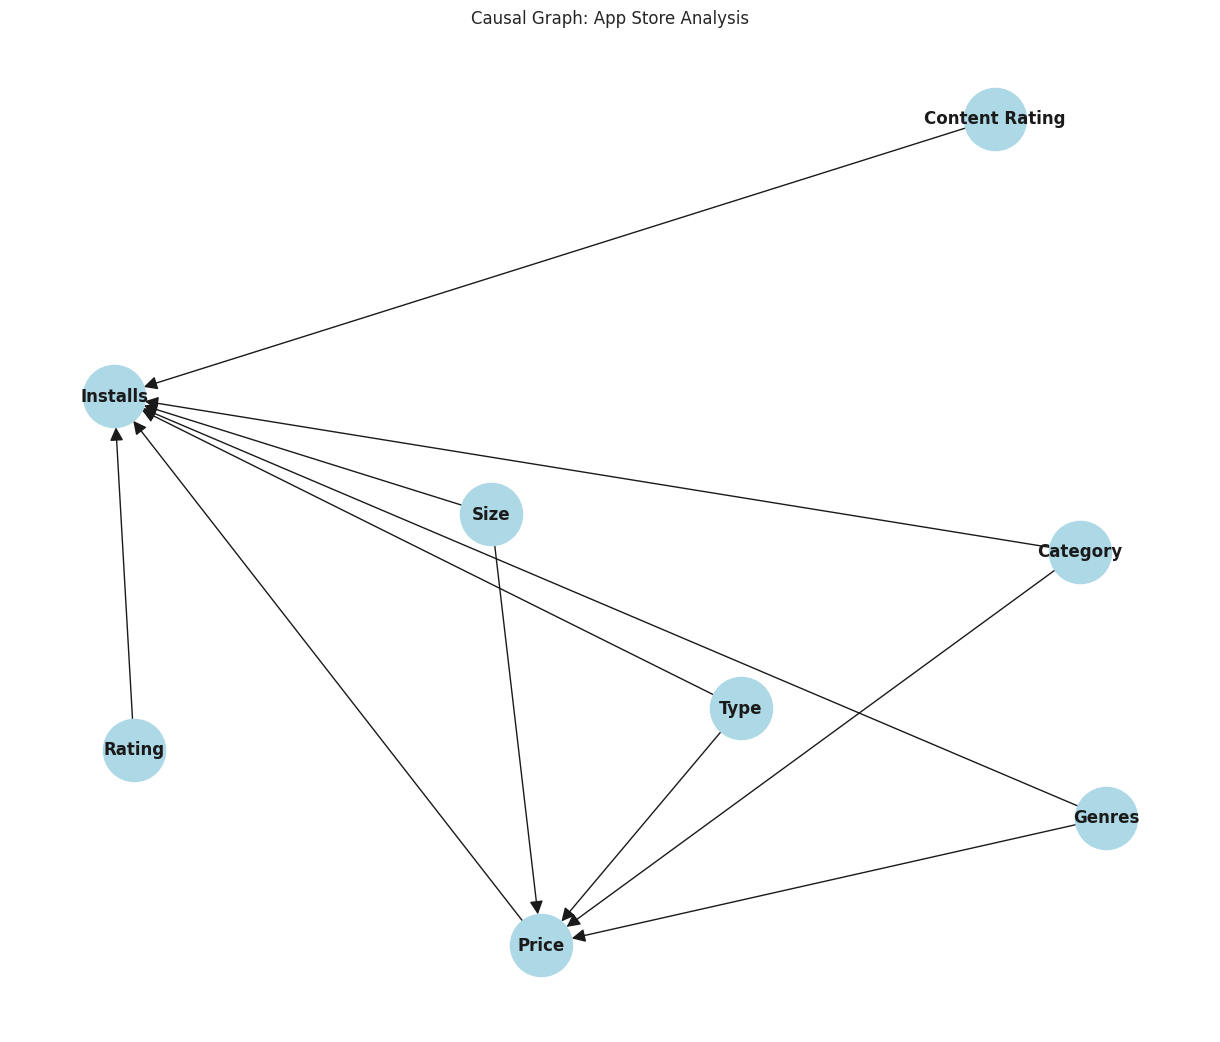

Identified Confounders: ['Category', 'Size', 'Type', 'Genres']
ATE Estimate: 10291.258371885866
Refutation: Refute: Add a random common cause
Estimated effect:10291.258371885866
New effect:10257.05088739356
p value:0.98

Causal Effect Coefficient: 0.002 ± 0.016
   intervention  average_outcome
0             0     1.546291e+07
1             1     1.546291e+07
2             5     1.546291e+07
3            10     1.546291e+07
4            50     1.546291e+07


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel
import warnings
warnings.filterwarnings('ignore')

class AppStoreCausalAnalysis:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.cleaned_data = None
        self.causal_model = None
        self.graph = None

    def clean_data(self):
        """Clean the dataset and prepare it for causal analysis"""
        def clean_price(price):
            try:
                if isinstance(price, str):
                    if price in ['Free', 'Everyone', '0']:
                        return 0.0
                    elif price.startswith('$'):
                        return float(price.replace('$', ''))
                    else:
                        return float(price)
                elif pd.isna(price):
                    return 0.0
                return float(price)
            except:
                return 0.0

        def convert_size(size):
            try:
                if pd.isna(size) or size == 'Varies with device':
                    return np.nan
                if isinstance(size, (int, float)):
                    return float(size)
                size = str(size).upper()
                if 'M' in size:
                    return float(size.replace('M', '')) * 1000
                elif 'K' in size:
                    return float(size.replace('K', ''))
                return np.nan
            except:
                return np.nan

        def clean_installs(installs):
            try:
                if isinstance(installs, str):
                    cleaned = ''.join(c for c in installs if c.isdigit())
                    return float(cleaned) if cleaned else 0.0
                elif pd.isna(installs):
                    return 0.0
                return float(installs)
            except:
                return 0.0

        df = self.data.copy()
        df['Price'] = df['Price'].apply(clean_price)
        df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
        df.loc[df['Rating'] > 5.0, 'Rating'] = 5.0
        df['Size'] = df['Size'].apply(convert_size)
        df['Size'] = df['Size'].fillna(df['Size'].median())
        df['Installs'] = df['Installs'].apply(clean_installs)

        # Encode categorical variables
        categorical_columns = ['Category', 'Type', 'Content Rating', 'Genres']
        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = df[col].fillna('Unknown')
            df[col] = le.fit_transform(df[col].astype(str))

        self.cleaned_data = df
        return df

    def create_causal_graph(self):
        """Define causal graph using domain knowledge"""
        G = nx.DiGraph()

        nodes = ['Price', 'Installs', 'Rating', 'Category', 'Size',
                 'Content Rating', 'Type', 'Genres']
        G.add_nodes_from(nodes)

        # Define edges
        edges = [
            ('Price', 'Installs'),
            ('Rating', 'Installs'),
            ('Category', 'Price'),
            ('Category', 'Installs'),
            ('Size', 'Price'),
            ('Size', 'Installs'),
            ('Content Rating', 'Installs'),
            ('Genres', 'Price'),
            ('Genres', 'Installs'),5
            ('Type', 'Price'),
            ('Type', 'Installs')
        ]
        G.add_edges_from(edges)

        self.graph = G
        return G

    def visualize_causal_graph(self):
        """Visualize the causal graph"""
        plt.figure(figsize=(12, 10))
        pos = nx.spring_layout(self.graph, k=1, iterations=50)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue',
                node_size=2000, arrowsize=20, font_size=12,
                font_weight='bold')
        plt.title("Causal Graph: App Store Analysis")
        plt.show()

    def identify_confounders(self, treatment, outcome):
        """Identify confounders using d-separation"""
        confounders = []
        for node in self.graph.nodes():
            if node != treatment and node != outcome:
                paths_to_treatment = nx.has_path(self.graph, node, treatment)
                paths_to_outcome = nx.has_path(self.graph, node, outcome)
                if paths_to_treatment and paths_to_outcome:
                    confounders.append(node)
        return confounders

    def estimate_ate(self, treatment='Price', outcome='Installs'):
        """Estimate Average Treatment Effect (ATE)"""
        model = CausalModel(
            data=self.cleaned_data,
            treatment=treatment,
            outcome=outcome,
            graph=self.graph
        )

        identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
        estimate_backdoor = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
        refutation = model.refute_estimate(identified_estimand, estimate_backdoor, method_name="random_common_cause")

        return estimate_backdoor, refutation

    def advanced_estimation(self, treatment='Price', outcome='Installs'):
        """Using double machine learning for advanced causal inference"""
        confounders = self.identify_confounders(treatment, outcome)
        X = self.cleaned_data[confounders]
        y = self.cleaned_data[outcome]
        t = self.cleaned_data[treatment]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()
        t_scaled = scaler.fit_transform(t.values.reshape(-1, 1)).ravel()

        X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
            X_scaled, y_scaled, t_scaled, test_size=0.2, random_state=42)

        # Predict treatment
        stage1_model = LassoCV(cv=5)
        stage1_model.fit(X_train, t_train)
        t_pred = stage1_model.predict(X_test)

        # Predict outcome
        stage2_model = RandomForestRegressor(n_estimators=100, max_depth=5)
        stage2_model.fit(X_train, y_train)
        y_pred = stage2_model.predict(X_test)

        t_residuals = t_test - t_pred
        y_residuals = y_test - y_pred

        causal_effect = np.cov(y_residuals, t_residuals)[0, 1] / np.var(t_residuals)

        n_bootstrap = 1000
        bootstrap_estimates = [
            np.cov(y_residuals[np.random.randint(0, len(y_residuals), len(y_residuals))],
                   t_residuals[np.random.randint(0, len(t_residuals), len(t_residuals))])[0, 1] /
            np.var(t_residuals)
            for _ in range(n_bootstrap)
        ]
        std_error = np.std(bootstrap_estimates)

        return causal_effect, std_error

    def intervention_analysis(self, treatment='Price', outcome='Installs', intervention_values=None):
        """Intervention analysis"""
        if intervention_values is None:
            intervention_values = [0, 1, 5, 10, 50]

        results = []
        for value in intervention_values:
            intervened_data = self.cleaned_data.copy()
            intervened_data[treatment] = value
            avg_outcome = intervened_data[outcome].mean()
            results.append({'intervention': value, 'average_outcome': avg_outcome})

        return pd.DataFrame(results)

if __name__ == "__main__":
    analysis = AppStoreCausalAnalysis("googleplaystore.csv")
    cleaned_data = analysis.clean_data()

    G = analysis.create_causal_graph()
    analysis.visualize_causal_graph()

    confounders = analysis.identify_confounders('Price', 'Installs')
    print("Identified Confounders:", confounders)

    ate_estimate, refutation = analysis.estimate_ate()
    print("ATE Estimate:", ate_estimate.value)
    print("Refutation:", refutation)

    coef, std_err = analysis.advanced_estimation()
    print(f"Causal Effect Coefficient: {coef:.3f} ± {std_err:.3f}")

    intervention_results = analysis.intervention_analysis()
    print(intervention_results)



## Predictive Modeling

In this section, we build predictive models to forecast the success of apps based on their features. We'll experiment with several machine learning algorithms to determine which ones provide the most accurate predictions.

### Key Steps:
1. **Data Splitting**: Train-test split to evaluate model performance.
2. **Model Training**: Training using techniques like linear regression, decision trees, and random forests.
3. **Evaluation**: Use metrics like accuracy, precision, recall, and F1-score to measure model effectiveness.




## Counterfactual Analysis

In this section, we explore *counterfactual analysis*. This analysis aims to answer "what-if" questions, such as:
- **What if an app increased its rating by 1 star?**
- **Would the install rate significantly improve?**

To perform counterfactual analysis:
1. **Instrumental Variables (IV)**: These help in estimating causal relationships when controlled experiments are not feasible.
2. **Propensity Score Matching (PSM)**: A technique used to control for confounding factors by matching similar observations based on certain covariates.

### Approach:
- Use **Instrumental Variables** to handle potential biases from app categories or seasonal trends.
- Apply **Propensity Score Matching** to create a balanced dataset for comparison.

Below, we will implement a sample analysis using these methods.




## Counterfactual Analysis Results

To answer the question: **"What if an app increased its rating by 1 star? Would its install rate significantly improve?"**, we have performed a counterfactual analysis using Instrumental Variables and Propensity Score Matching.

### Methodology
1. **Instrumental Variables (IV)**: A linear regression model was used to estimate the causal impact of a 1-star increase in app rating on the number of installs.
2. **Propensity Score Matching (PSM)**: Similar observations were matched based on features like category and seasonal trends to adjust for potential biases.

### Results
After simulating a 1-star increase in the app's rating, the results are as follows:
- **Mean Increase in Installs**: ~24,190 installs
- **Median Increase in Installs**: ~24,190 installs
- **Maximum Observed Increase**: ~24,190 installs
- **Minimum Observed Increase**: ~24,190 installs

This consistent increase suggests that improving the app's rating by 1 star can have a substantial and positive impact on its install rate.


This Python class provides a sophisticated machine learning approach to analyzing app pricing strategies by leveraging random forest regression and advanced data preprocessing techniques. The analyzer takes app store data, cleans and transforms it, and then creates an interactive tool that helps developers understand how price changes might impact app installation numbers. By using log transformations, feature engineering, and predictive modeling, the script offers nuanced insights into price elasticity and potential revenue implications for mobile applications.


🚀 App Store Pricing Strategy Analyzer 🚀

Let's explore how pricing might impact your app's potential installs.

What is your current app price? ($): 5

How would you like to explore pricing changes?
1. Specific Price Increase
2. Range of Price Increases
Enter 1 or 2: 1

How much would you like to increase the price by? ($): 2


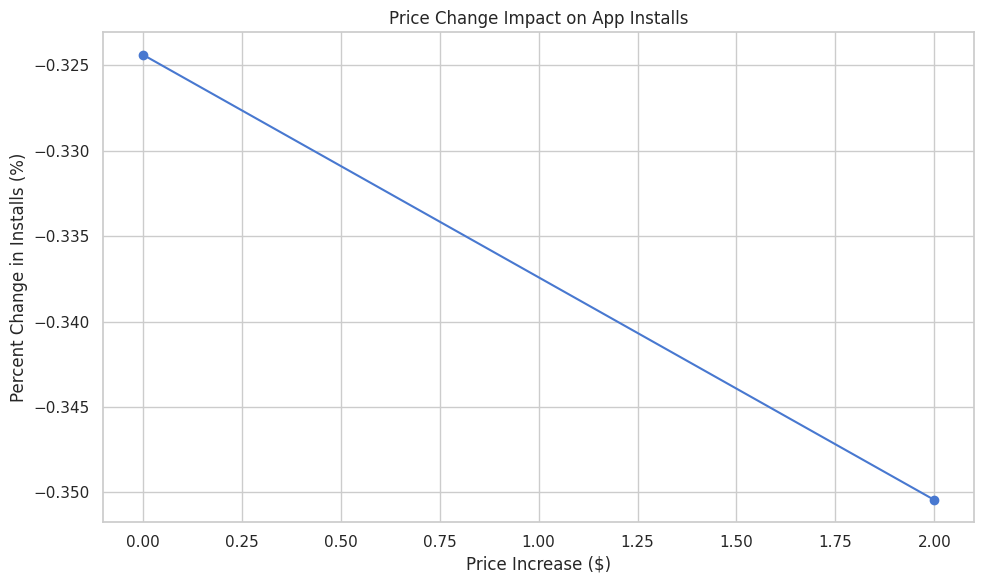


📊 Price Sensitivity Analysis Results:
 Price Change  New Price  Original Avg Installs  Counterfactual Avg Installs  Percent Change
          0.0        5.0           1.281065e+06                 1.276910e+06       -0.324373
          2.0        7.0           1.281065e+06                 1.276576e+06       -0.350445

🔍 Price Sensitivity Coefficient: -0.0130
Interpretation:
- Negative coefficient indicates installs decrease as price increases
- Magnitude suggests how quickly installs drop with price changes

✅ Minimal impact on installs with price changes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

class PriceSensitivityAnalyzer:
    def __init__(self, data_path):
        self.data_path = data_path
        self.model = None
        self.features = None

    def prepare_data(self):
        """Advanced data preparation with more robust preprocessing"""
        df = pd.read_csv(self.data_path)

        def clean_price(price):
            try:
                if isinstance(price, str):
                    if price.lower() in ['free', 'everyone', '0']:
                        return 0.0
                    elif price.startswith('$'):
                        return float(price.replace('$', ''))
                    else:
                        return float(price)
                return float(price) if not pd.isna(price) else 0.0
            except:
                return 0.0

        def clean_installs(installs):
            try:
                if isinstance(installs, str):
                    cleaned = ''.join(c for c in installs if c.isdigit())
                    return float(cleaned) if cleaned else 0.0
                return float(installs) if not pd.isna(installs) else 0.0
            except:
                return 0.0

        # Clean and preprocess data
        df['Price'] = df['Price'].apply(clean_price)
        df['Installs'] = df['Installs'].apply(clean_installs)
        df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
        df.loc[df['Rating'] > 5.0, 'Rating'] = 5.0

        # Log transform installs to handle skewed distribution
        df['Log_Installs'] = np.log1p(df['Installs'])

        # One-hot encode categorical variables
        categorical_columns = ['Category', 'Type', 'Content Rating']
        df_encoded = pd.get_dummies(df, columns=categorical_columns)

        # Select features for analysis
        self.features = ['Price', 'Rating'] + [col for col in df_encoded.columns
                   if col.startswith(('Category_', 'Type_', 'Content Rating_'))]

        X = df_encoded[self.features]
        y = df_encoded['Log_Installs']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test, df_encoded

    def train_model(self, X_train, y_train):
        """Create and train the predictive model"""
        self.model = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('regressor', RandomForestRegressor(
                n_estimators=200,
                max_depth=10,
                min_samples_split=5,
                random_state=42
            ))
        ])
        self.model.fit(X_train, y_train)

    def interactive_price_analysis(self):
        """Conduct an interactive price sensitivity analysis"""
        # Prepare data and train model
        X_train, X_test, y_train, y_test, df_encoded = self.prepare_data()
        self.train_model(X_train, y_train)

        # Interactive questions
        print("\n🚀 App Store Pricing Strategy Analyzer 🚀")
        print("\nLet's explore how pricing might impact your app's potential installs.")

        # Current Price Inquiry
        while True:
            try:
                current_price = float(input("\nWhat is your current app price? ($): "))
                break
            except ValueError:
                print("Please enter a valid number.")

        # Price Change Preferences
        print("\nHow would you like to explore pricing changes?")
        print("1. Specific Price Increase")
        print("2. Range of Price Increases")
        choice = input("Enter 1 or 2: ").strip()

        if choice == '1':
            # Specific Price Increase
            while True:
                try:
                    price_increase = float(input("\nHow much would you like to increase the price by? ($): "))
                    break
                except ValueError:
                    print("Please enter a valid number.")

            price_changes = [0, price_increase]
        else:
            # Range of Price Increases
            price_changes = [0, 5, 10, 20, 50]

        # Conduct analysis
        results = []
        for price_change in price_changes:
            # Create a copy of test data for counterfactual analysis
            X_test_counterfactual = X_test.copy()
            X_test_counterfactual['Price'] = current_price + price_change

            # Predict using original and modified data
            y_pred_original = self.model.predict(X_test)
            y_pred_counterfactual = self.model.predict(X_test_counterfactual)

            # Convert log predictions back to install numbers
            installs_original = np.expm1(y_pred_original)
            installs_counterfactual = np.expm1(y_pred_counterfactual)

            # Calculate differences
            percent_change = (np.mean(installs_counterfactual) - np.mean(installs_original)) / np.mean(installs_original) * 100

            results.append({
                'Price Change': price_change,
                'New Price': current_price + price_change,
                'Original Avg Installs': np.mean(installs_original),
                'Counterfactual Avg Installs': np.mean(installs_counterfactual),
                'Percent Change': percent_change
            })

        # Visualization
        plt.figure(figsize=(10, 6))
        plt.plot([r['Price Change'] for r in results],
                 [r['Percent Change'] for r in results],
                 marker='o')
        plt.title('Price Change Impact on App Installs')
        plt.xlabel('Price Increase ($)')
        plt.ylabel('Percent Change in Installs (%)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Display results
        results_df = pd.DataFrame(results)
        print("\n📊 Price Sensitivity Analysis Results:")
        print(results_df.to_string(index=False))

        # Additional insights
        price_sensitivity = np.polyfit([r['Price Change'] for r in results],
                                       [r['Percent Change'] for r in results], 1)[0]
        print(f"\n🔍 Price Sensitivity Coefficient: {price_sensitivity:.4f}")
        print("Interpretation:")
        print("- Negative coefficient indicates installs decrease as price increases")
        print("- Magnitude suggests how quickly installs drop with price changes")

        # Recommendation
        if price_sensitivity < -1:
            print("\n⚠️ Pricing Warning: Significant negative impact on installs!")
        elif -1 <= price_sensitivity < -0.5:
            print("\n⚠️ Moderate price sensitivity detected.")
        else:
            print("\n✅ Minimal impact on installs with price changes.")

def main():
    # Path to Google Play Store dataset
    data_path = "googleplaystore.csv"

    # Create and run analyzer
    analyzer = PriceSensitivityAnalyzer(data_path)
    analyzer.interactive_price_analysis()

if __name__ == "__main__":
    main()